# Wikipedia Pageviews Basic EDA (2015-2025)

This notebook provides a basic exploration of Wikipedia pageview data using the `WikipediaAPIClient` defined in `src/`. 

**Data Persistence Pattern:**
We use the `data/raw` folder to cache our API results. This avoids unnecessary network calls and ensures we have a local copy of our source data.

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add src directory to path
sys.path.append(os.path.abspath("../"))

from src.api_client import WikipediaAPIClient
from src.data_prep import clean_pageview_data, aggregate_data, add_time_features

plt.style.use("seaborn-v0_8")
%matplotlib inline

## Data Acquisition (with Caching)

Check if we already have the data locally. If not, fetch it from the Wikimedia API and save it to `data/raw`.

In [14]:
RAW_DATA_PATH = "../data/raw/en_wiki_pageviews_monthly.csv"

if not os.path.exists(RAW_DATA_PATH):
    print("Local data not found. Fetching from API...")
    client = WikipediaAPIClient()
    
    # Fetching monthly aggregate views for English Wikipedia
    df_monthly = client.get_aggregate_pageviews(
        project="en.wikipedia.org",
        start="20150101",
        end="20251231",
        granularity="monthly"
    )
    
    if df_monthly is not None:
        df_monthly.to_csv(RAW_DATA_PATH, index=False)
        print(f"Data successfully fetched and saved to {RAW_DATA_PATH}")
else:
    print(f"Loading source data from local cache: {RAW_DATA_PATH}")
    df_monthly = pd.read_csv(RAW_DATA_PATH)
    # Note: CSV stores dates as strings, so we convert them back to datetime objects
    df_monthly["timestamp"] = pd.to_datetime(df_monthly["timestamp"])

display(df_monthly.head())

Loading source data from local cache: ../data/raw/en_wiki_pageviews_monthly.csv


,timestamp,views
0,2015-07-01,7665421980
1,2015-08-01,7634815221
2,2015-09-01,7655695037
3,2015-10-01,7746031887
4,2015-11-01,7524321290


## Basic Visualization

Plot the trend over the years.

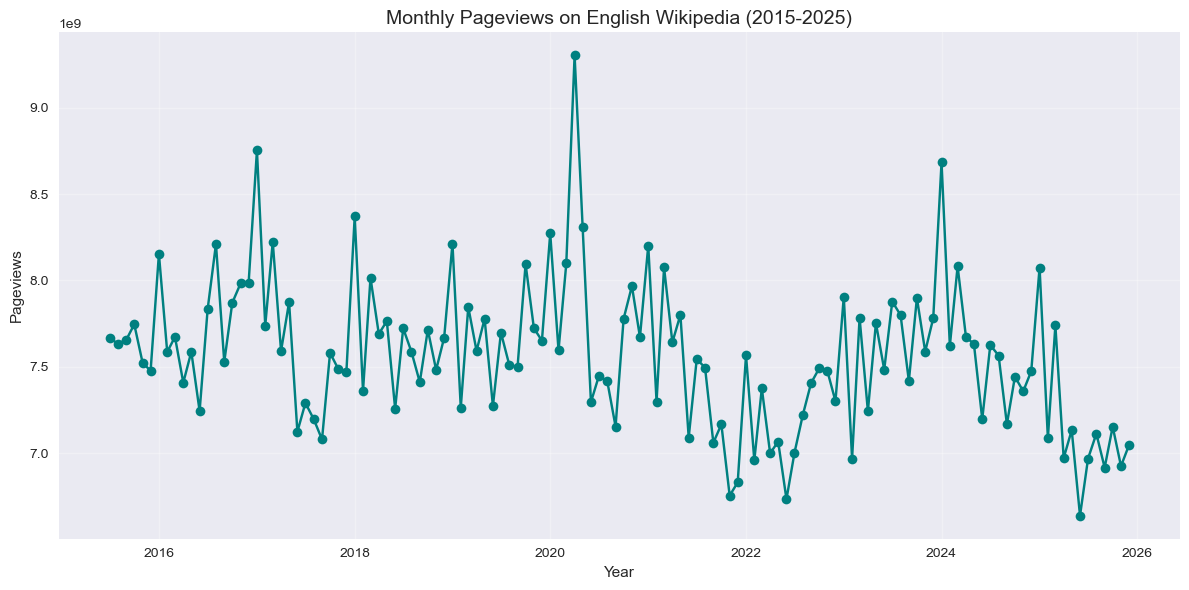

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df_monthly["timestamp"], df_monthly["views"], marker='o', linestyle='-', color='teal')
plt.title("Monthly Pageviews on English Wikipedia (2015-2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Pageviews")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Data Processing and Storage

We can aggregate the data and save the result to the `data/processed` folder. This is useful for sharing summarized data without needing the full raw dataset.

Yearly aggregated data saved to ../data/processed/en_wiki_pageviews_yearly.csv


C:\Users\preet\AppData\Local\Temp\ipykernel_10976\4229548363.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_yearly["timestamp"].dt.year, y=df_yearly["views"], palette="viridis")


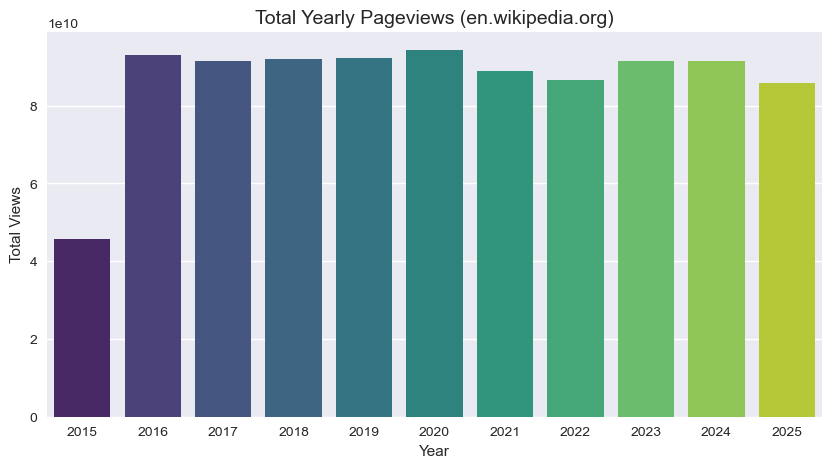

In [13]:
PROCESSED_DATA_PATH = "../data/processed/en_wiki_pageviews_yearly.csv"

df_yearly = aggregate_data(df_monthly, frequency="YE") # 'YE' for Year End

# Save processed data
df_yearly.to_csv(PROCESSED_DATA_PATH, index=False)
print(f"Yearly aggregated data saved to {PROCESSED_DATA_PATH}")

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=df_yearly["timestamp"].dt.year, y=df_yearly["views"], palette="viridis")
plt.title("Total Yearly Pageviews (en.wikipedia.org)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Views")
plt.show()